In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
column_name = ['age', 'sex', 'cp', 'treshbps', 'chol', 'fbs', 'restecg',
               'thalach', 'exang', 'oldpeak', 'slop', 'ca', 'thal',
               'HeartDisease']
raw_data = pd.read_excel('./datasets/heart-disease.xlsx',
                         header=None, names=column_name)
print(raw_data.head())

   age  sex  cp  treshbps chol  fbs  restecg  thalach  exang  oldpeak  slop ca thal  HeartDisease
0   63    1   1       145  233    1        2      150      0      2.3     3  0    6             0
1   67    1   4       160  286    0        0      108      1      1.5     2  3    3             1
2   67    1   4       120    ?    0        2      129      1      2.6     2  2    7             1
3   37    1   3       130  250    0        0      187      0      3.5     3  0    3             0
4   41    0   2       130  204    0        2      172      0      1.4     1  0    3             0


In [1]:
raw_data.info()

NameError: name 'raw_data' is not defined

In [ ]:
raw_data.describe()

,age,sex,cp,treshbps,fbs,restecg,thalach,exang,oldpeak,slop,HeartDisease
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,0.148515,0.983498,149.607261,0.326733,1.039604,1.600660,0.458746
std,9.038662,0.467299,0.960126,17.599748,0.356198,0.994883,22.875003,0.469794,1.161075,0.616226,0.499120
min,29.000000,0.000000,1.000000,94.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,0.000000,0.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [ ]:
clean_data = raw_data.replace('?', np.nan)
clean_data = clean_data.dropna()
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296 entries, 0 to 301
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           296 non-null    int64  
 1   sex           296 non-null    int64  
 2   cp            296 non-null    int64  
 3   treshbps      296 non-null    int64  
 4   chol          296 non-null    float64
 5   fbs           296 non-null    int64  
 6   restecg       296 non-null    int64  
 7   thalach       296 non-null    int64  
 8   exang         296 non-null    int64  
 9   oldpeak       296 non-null    float64
 10  slop          296 non-null    int64  
 11  ca            296 non-null    float64
 12  thal          296 non-null    float64
 13  HeartDisease  296 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 34.7 KB


In [ ]:
keep = column_name.pop()
print(keep)
print(column_name)

HeartDisease
['age', 'sex', 'cp', 'treshbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slop', 'ca', 'thal']


In [ ]:
training_data = clean_data[column_name]
target = clean_data[[keep]]
print(training_data)
print(target)

     age  sex  cp  treshbps   chol  fbs  restecg  thalach  exang  oldpeak  slop   ca  thal
0     63    1   1       145  233.0    1        2      150      0      2.3     3  0.0   6.0
1     67    1   4       160  286.0    0        0      108      1      1.5     2  3.0   3.0
3     37    1   3       130  250.0    0        0      187      0      3.5     3  0.0   3.0
4     41    0   2       130  204.0    0        2      172      0      1.4     1  0.0   3.0
5     56    1   2       120  236.0    0        0      178      0      0.8     1  0.0   3.0
..   ...  ...  ..       ...    ...  ...      ...      ...    ...      ...   ...  ...   ...
297   57    0   4       140  241.0    0        0      123      1      0.2     2  0.0   7.0
298   45    1   1       110  264.0    0        0      132      0      1.2     2  0.0   7.0
299   68    1   4       144  193.0    1        0      141      0      3.4     2  2.0   7.0
300   57    1   4       130  131.0    0        0      115      1      1.2     2  1.0   7.0

In [ ]:
print(target['HeartDisease'].sum())

136


In [ ]:
print(target['HeartDisease'].mean())

0.4594594594594595


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(training_data)
scaled_data = pd.DataFrame(scaled_data, columns=column_name)
print(scaled_data)

          age       sex        cp  treshbps  ...   oldpeak      slop        ca      thal
0    0.942285  0.692820 -2.236793  0.747441  ...  1.074839  2.264087 -0.718421  0.660262
1    1.385714  0.692820  0.876486  1.592523  ...  0.386756  0.645320  2.487397 -0.890830
2   -1.939999  0.692820 -0.161274 -0.097641  ...  2.106963  2.264087 -0.718421 -0.890830
3   -1.496571 -1.443376 -1.199033 -0.097641  ...  0.300746 -0.973448 -0.718421 -0.890830
4    0.166286  0.692820 -1.199033 -0.661029  ... -0.215316 -0.973448 -0.718421 -0.890830
..        ...       ...       ...       ...  ...       ...       ...       ...       ...
291  0.277143 -1.443376  0.876486  0.465747  ... -0.731379  0.645320 -0.718421  1.177293
292 -1.053142  0.692820 -2.236793 -1.224417  ...  0.128725  0.645320 -0.718421  1.177293
293  1.496571  0.692820  0.876486  0.691102  ...  2.020953  0.645320  1.418791  1.177293
294  0.277143  0.692820  0.876486 -0.097641  ...  0.128725  0.645320  0.350185  1.177293
295  0.277143 -1.4433

In [ ]:
scaled_data.describe()

,age,sex,cp,treshbps,chol,fbs,restecg,thalach,exang,oldpeak,slop,ca,thal
count,2.960000e+02,2.960000e+02,2.960000e+02,2.960000e+02,2.960000e+02,2.960000e+02,2.960000e+02,2.960000e+02,2.960000e+02,2.960000e+02,2.960000e+02,2.960000e+02,2.960000e+02
mean,3.000603e-18,6.001206e-18,1.140229e-16,5.911187e-16,1.500301e-17,1.200241e-17,-2.400482e-17,6.001206e-16,-9.001808e-18,-1.200241e-17,4.200844e-17,-1.200241e-17,5.401085e-17
std,1.001693e+00,1.001693e+00,1.001693e+00,1.001693e+00,1.001693e+00,1.001693e+00,1.001693e+00,1.001693e+00,1.001693e+00,1.001693e+00,1.001693e+00,1.001693e+00,1.001693e+00
min,-2.826856e+00,-1.443376e+00,-2.236793e+00,-2.125838e+00,-2.335451e+00,-4.122626e-01,-9.933122e-01,-3.433796e+00,-6.928203e-01,-9.033993e-01,-9.734482e-01,-7.184209e-01,-8.908300e-01
25%,-7.205712e-01,-1.443376e+00,-1.612735e-01,-6.610293e-01,-7.004143e-01,-4.122626e-01,-9.933122e-01,-6.948401e-01,-6.928203e-01,-9.033993e-01,-9.734482e-01,-7.184209e-01,-8.908300e-01
50%,1.662857e-01,6.928203e-01,-1.612735e-01,-9.764125e-02,-8.487113e-02,-4.122626e-01,-4.898526e-01,1.453973e-01,-6.928203e-01,-2.153165e-01,6.453196e-01,-7.184209e-01,-8.908300e-01
75%,7.205712e-01,6.928203e-01,8.764865e-01,4.657468e-01,5.547167e-01,-4.122626e-01,1.020526e+00,7.128304e-01,1.443376e+00,4.727664e-01,6.453196e-01,3.501851e-01,1.177293e+00
max,2.494285e+00,6.928203e-01,8.764865e-01,3.846075e+00,6.089796e+00,2.425638e+00,1.020526e+00,2.284183e+00,1.443376e+00,4.429243e+00,2.264087e+00,2.487397e+00,1.177293e+00


In [ ]:
scaled_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,296.0,3.000603e-18,1.001693,-2.826856,-0.720571,0.166286,0.720571,2.494285
sex,296.0,6.001206e-18,1.001693,-1.443376,-1.443376,0.692820,0.692820,0.692820
cp,296.0,1.140229e-16,1.001693,-2.236793,-0.161274,-0.161274,0.876486,0.876486
treshbps,296.0,5.911187e-16,1.001693,-2.125838,-0.661029,-0.097641,0.465747,3.846075
chol,296.0,1.500301e-17,1.001693,-2.335451,-0.700414,-0.084871,0.554717,6.089796
fbs,296.0,1.200241e-17,1.001693,-0.412263,-0.412263,-0.412263,-0.412263,2.425638
restecg,296.0,-2.400482e-17,1.001693,-0.993312,-0.993312,-0.489853,1.020526,1.020526
thalach,296.0,6.001206e-16,1.001693,-3.433796,-0.694840,0.145397,0.712830,2.284183
exang,296.0,-9.001808e-18,1.001693,-0.692820,-0.692820,-0.692820,1.443376,1.443376
oldpeak,296.0,-1.200241e-17,1.001693,-0.903399,-0.903399,-0.215316,0.472766,4.429243


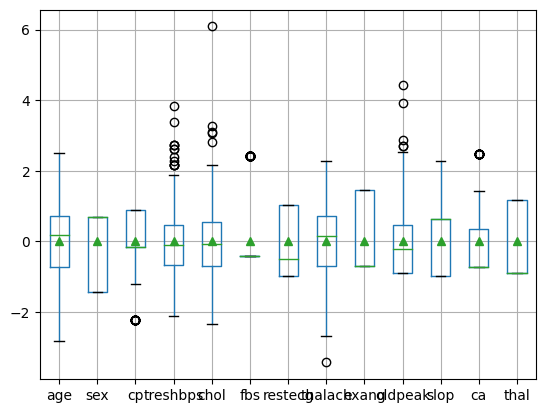

In [ ]:
boxplot = scaled_data.boxplot(column=column_name, showmeans=True)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    scaled_data, target, test_size=0.30)
print('x_train shape', x_train.shape)
print('y_train shape', y_train.shape)
print('x_test shape', x_test.shape)
print('y_test shape', y_test.shape)

x_train shape (207, 13)
y_train shape (207, 1)
x_test shape (89, 13)
y_test shape (89, 1)


In [ ]:
model = Sequential()
model.add(Dense(512, input_dim=13, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 512)               7168      
                                                                 
 dropout_9 (Dropout)         (None, 512)               0         
                                                                 
 dense_17 (Dense)            (None, 256)               131328    
                                                                 
 dropout_10 (Dropout)        (None, 256)               0         
                                                                 
 dense_18 (Dense)            (None, 128)               32896     
                                                                 
 dropout_11 (Dropout)        (None, 128)               0         
                                                                 
 dense_19 (Dense)            (None, 1)                

In [ ]:
model.compile(loss='mse', optimizer='adam', metrics=['binary_accuracy'])
fit_hist = model.fit(x_train, y_train, batch_size=50, epochs=20,
                     validation_split=0.2, verbose=1)

Epoch 1/20
4/4 [==============================] - 1s 92ms/step - loss: 0.2426 - binary_accuracy: 0.5879 - val_loss: 0.1757 - val_binary_accuracy: 0.8571
Epoch 2/20
4/4 [==============================] - 0s 21ms/step - loss: 0.1688 - binary_accuracy: 0.8182 - val_loss: 0.1211 - val_binary_accuracy: 0.9048
Epoch 3/20
4/4 [==============================] - 0s 20ms/step - loss: 0.1288 - binary_accuracy: 0.8606 - val_loss: 0.0961 - val_binary_accuracy: 0.9048
Epoch 4/20
4/4 [==============================] - 0s 24ms/step - loss: 0.1117 - binary_accuracy: 0.8364 - val_loss: 0.0930 - val_binary_accuracy: 0.8810
Epoch 5/20
4/4 [==============================] - 0s 19ms/step - loss: 0.1152 - binary_accuracy: 0.8364 - val_loss: 0.0898 - val_binary_accuracy: 0.8810
Epoch 6/20
4/4 [==============================] - 0s 29ms/step - loss: 0.1073 - binary_accuracy: 0.8788 - val_loss: 0.0869 - val_binary_accuracy: 0.8810
Epoch 7/20
4/4 [==============================] - 0s 27ms/step - loss: 0.1054 - bi

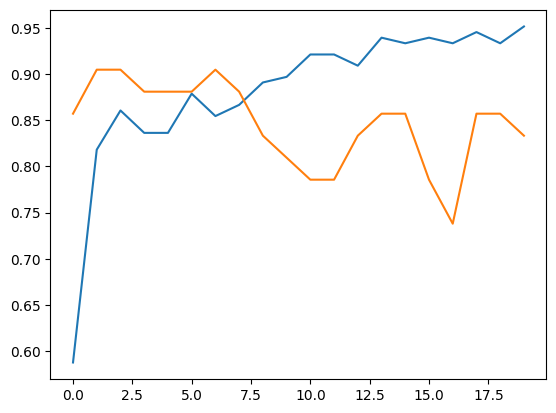

In [ ]:
plt.plot(fit_hist.history['binary_accuracy'])
plt.plot(fit_hist.history['val_binary_accuracy'])
plt.show()

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Keras DNN model loss :', score[0])
print('Keras DNN model accuracy :', score[1])

Keras DNN model loss : 0.11583533138036728
Keras DNN model accuracy : 0.8539325594902039
